In [4]:
import os
import csv
import pandas as pd
import json
import matplotlib.pyplot as plt

In [5]:
exp_name = 'small-10-gen' #"8-gen" #"small-10-gen" #"retest-4-gen" #"31-dic"
log_folder = f"../out/log/{exp_name}"
exp_folder = f"../out/exp/{exp_name}"
models_folder = f"../out/models/{exp_name}"
max_epochs = 600
main_metric = "val_NDCG_@10/dataloader_idx"

exp_name_64 = '8-gen' #"8-gen" #"small-10-gen" #"retest-4-gen" #"31-dic"
log_folder_64 = f"../out/log/{exp_name_64}"
exp_folder_64 = f"../out/exp/{exp_name_64}"
models_folder_64 = f"../out/models/{exp_name_64}"

In [6]:
# Inside each folder of folder, load the metrics.csv and get the last value of column
column_to_get = f"{main_metric}_0"

exps = {}
not_finished_exps = set()
for exp_id in os.listdir(log_folder):
    metrics_file = os.path.join(log_folder, exp_id, "lightning_logs", "version_0", "metrics.csv")
    if not os.path.exists(metrics_file):
        continue
    df = pd.read_csv(metrics_file)
  
    # get best value of column
    if column_to_get in df.columns:
        exps[exp_id] = df[column_to_get].max()


for exp_id in os.listdir(log_folder_64):
    metrics_file = os.path.join(log_folder_64, exp_id, "lightning_logs", "version_0", "metrics.csv")
    if not os.path.exists(metrics_file):
        continue
    df = pd.read_csv(metrics_file)
  
    # get best value of column
    if column_to_get in df.columns:
        exps[exp_id] = df[column_to_get].max()

# sort by value
sorted_exps = sorted(exps.items(), key=lambda x: x[1], reverse=True)
# get top k
top_k_exps = sorted_exps#[:top_k]
print(top_k_exps)

[('JNakdleO5h1VNkAs', np.float64(0.8252649903297424)), ('bwgOgZMmtPqzXTX5', np.float64(0.8244391679763794)), ('nTbmF4ztrVMjdG9l', np.float64(0.8242731690406799)), ('bIRi5jGdphbEwBSc', np.float64(0.8220487833023071)), ('MxKmKvLTBEq7S7hI', np.float64(0.8215145468711853)), ('n6rEVYbY5ICNUPi9', np.float64(0.8208711743354797)), ('y8xB7g0x9MwiM2vY', np.float64(0.8207716941833496)), ('Hvtjn0eZdxuhzNiC', np.float64(0.8201366066932678)), ('LCfYOeOS7z3HaAtI', np.float64(0.8191713690757751)), ('dNCapAONs8cMyykL', np.float64(0.8191558718681335)), ('EHuynx3bStccaxTY', np.float64(0.8184081315994263)), ('gHkXRbc9cgO7hQnh', np.float64(0.8177088499069214)), ('T2p88a1EGTj2xFPT', np.float64(0.8174185752868652)), ('pqTS02zAG0qhL6sF', np.float64(0.8166709542274475)), ('QXCOWsmjCmvCaltS', np.float64(0.815820038318634)), ('l3JkxJ6q4I9pHJ5s', np.float64(0.8157130479812622)), ('fC2qrNR58cHNAMXy', np.float64(0.8153014183044434)), ('CRETUG0V3lBxxuDw', np.float64(0.8151336908340454)), ('Wpwcy1aOQ5FUFjTe', np.floa

In [7]:
#For each exp_id in exps, load the json configuration from exp_folder
confs = {}
for exp_id, _ in top_k_exps:
    config_file = os.path.join(exp_folder, f"{exp_id}.json")
    config_file_64 = os.path.join(exp_folder_64, f"{exp_id}.json")
    try:
        with open(config_file, "r") as f:
            c = json.load(f)
            if c['model']['rec_model']['emb_size'] != 64:
                confs[exp_id] = c
    except:
        with open(config_file_64, "r") as f:
            confs[exp_id] = json.load(f)

In [8]:
len(confs.keys())

1570

In [9]:
conf_name = {}
for exp_id,conf in confs.items():
    conf_init = conf.get("init",None)
    if conf_init is None:
        conf_name[exp_id] = "Random"
    else:
        if "alpha" in conf_init:
            conf_name[exp_id] = "Leporid"
        else:
            conf_name[exp_id] = "Truncated SVD"
            if conf_init["training"]["cutoff"]:
                conf_name[exp_id] += " (cutoff)"

In [10]:
separate_by = ["model.rec_model.name", "data_params.name", "model.rec_model.emb_size"]
separated_exps = {}
for exp_id, conf in confs.items():
    complete_key = []
    for keys_dotted in separate_by:
        app_conf = conf
        for key in keys_dotted.split("."):
            app_conf = app_conf.get(key, None)
            if app_conf is None:
                break
        complete_key.append(app_conf)
    complete_key = tuple(complete_key)
    if complete_key not in separated_exps:
        separated_exps[complete_key] = []
    separated_exps[complete_key].append(exp_id)

In [11]:
for k,v in separated_exps.items():
    print(k,len(v))

('SASRec', 'amazon_beauty', 64) 402
('GRU4Rec', 'amazon_beauty', 64) 176
('SASRec', 'amazon_beauty', 32) 4
('SASRec', 'amazon_beauty', 16) 3
('BERT4Rec', 'amazon_beauty', 64) 439
('BERT4Rec', 'amazon_beauty', 32) 4
('GRU4Rec', 'amazon_beauty', 32) 4
('SASRec', 'amazon_beauty', 8) 3
('BERT4Rec', 'amazon_beauty', 16) 3
('BERT4Rec', 'amazon_beauty', 8) 3
('GRU4Rec', 'amazon_beauty', 16) 3
('GRU4Rec', 'amazon_beauty', 8) 3
('SASRec', 'foursquare-tky', 64) 53
('GRU4Rec', 'foursquare-tky', 64) 31
('GRU4Rec', 'foursquare-tky', 32) 2
('SASRec', 'foursquare-tky', 32) 2
('BERT4Rec', 'foursquare-tky', 64) 36
('SASRec', 'foursquare-tky', 16) 2
('GRU4Rec', 'foursquare-tky', 16) 2
('SASRec', 'foursquare-tky', 8) 2
('BERT4Rec', 'foursquare-tky', 32) 2
('SASRec', 'ml-1m', 64) 98
('GRU4Rec', 'ml-1m', 64) 53
('SASRec', 'ml-1m', 32) 3
('GRU4Rec', 'ml-1m', 32) 3
('SASRec', 'bookcrossing', 32) 3
('BERT4Rec', 'foursquare-tky', 16) 2
('BERT4Rec', 'ml-1m', 64) 106
('SASRec', 'bookcrossing', 64) 8
('SASRec', '

In [12]:
# Inside each folder of folder, load the metrics.csv and get the complete column
exps_metrics = {}

test_metric = "val_NDCG_@10/dataloader_idx"

val_column = f"{main_metric}_0"
test_column = f"{test_metric}_1"

test_metrics = {}

for exp_id,_ in top_k_exps:
    metrics_file = os.path.join(log_folder, exp_id, "lightning_logs", "version_0", "metrics.csv")
    metrics_file_64 = os.path.join(log_folder_64, exp_id, "lightning_logs", "version_0", "metrics.csv")
    # if not os.path.exists(metrics_file):
    #     continue
    # load as pandas
    try:
        df = pd.read_csv(metrics_file)
    except:
        df = pd.read_csv(metrics_file_64)
    # get last value of column that is not nan
    column_values = df[test_column]
    exps_metrics[exp_id] = column_values.dropna().to_numpy()

    test_metrics[exp_id] = column_values[df[val_column].argmax()]

In [13]:
color_map = {
    "Random": '#66CCEE',
    "Truncated SVD": '#228833',
    "Leporid": '#CCBB44',
    "Truncated SVD (cutoff)": '#EE6677'
}

marker_map = {
    "Random": 'o',
    "Truncated SVD": 'v',
    "Leporid": 's',
    "Truncated SVD (cutoff)": 'p'
}

#markers = ['o', 'v', 's', 'p', 'P', '*', 'X', '+', 'D', 'x']

Plotting Truncated SVD (cutoff) JNakdleO5h1VNkAs
Plotting Truncated SVD bIRi5jGdphbEwBSc
Plotting Random MxKmKvLTBEq7S7hI
Plotting Leporid pqTS02zAG0qhL6sF


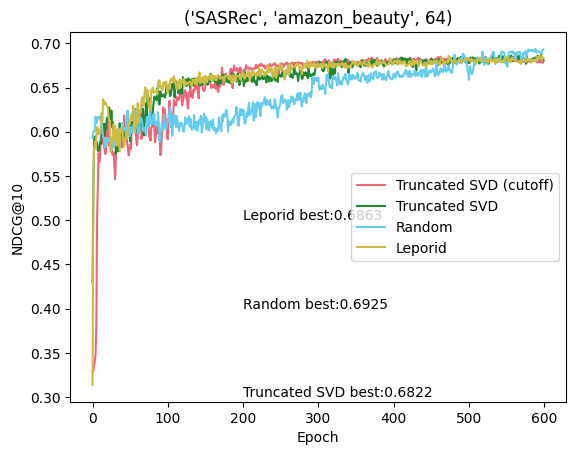

Plotting Random Hvtjn0eZdxuhzNiC
Plotting Leporid QXCOWsmjCmvCaltS
Plotting Truncated SVD (cutoff) Wpwcy1aOQ5FUFjTe
Plotting Truncated SVD kjJhty96JGzL09U5


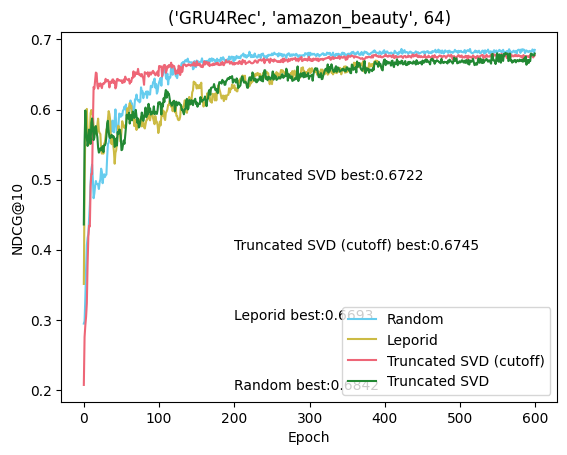

Plotting Leporid EHuynx3bStccaxTY
Plotting Truncated SVD (cutoff) WTj3gSEOaVStbC1Z
Plotting Truncated SVD TUuIAeTssWiMNTNh
Plotting Random Tfnjn3QOakIqMld8


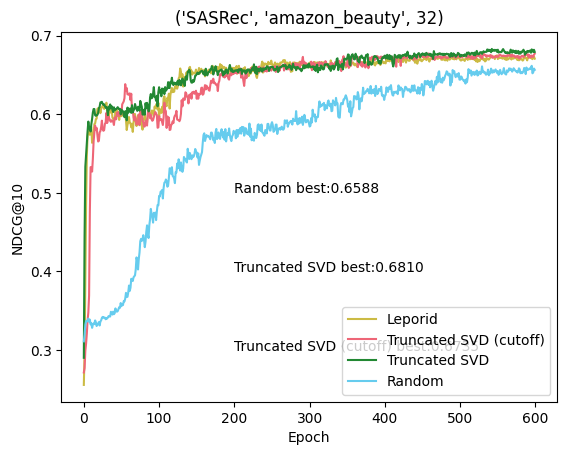

Plotting Leporid T2p88a1EGTj2xFPT
Plotting Truncated SVD gH9vpVwx8orcVIac
Plotting Random wOBmiw8ychNiYerJ


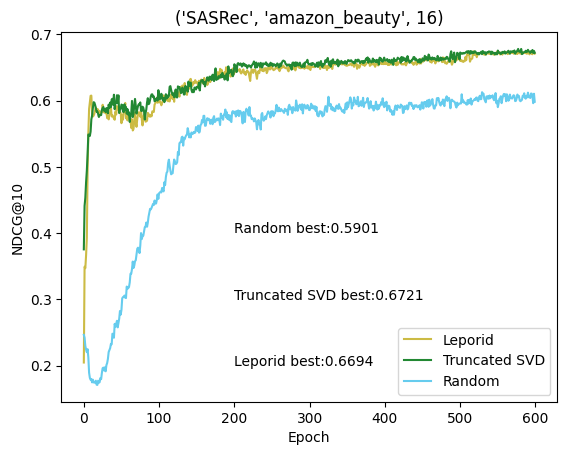

Plotting Truncated SVD (cutoff) 7Q90GvkjvaNRiWJs
Plotting Truncated SVD 2ucT8lwiqUSZb4UN
Plotting Leporid yS4gwrbw4GdPwkII
Plotting Random xewypB3UNyt6lpve


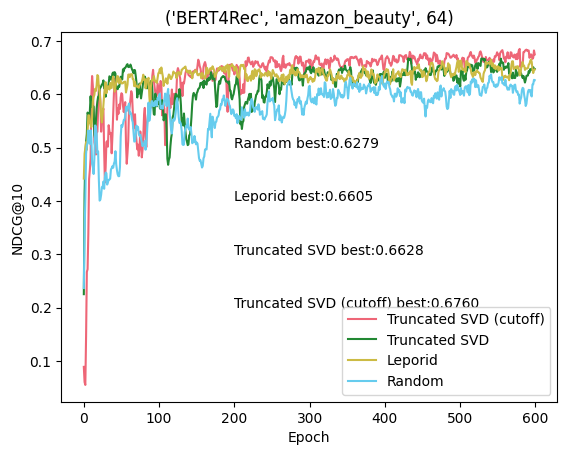

Plotting Truncated SVD (cutoff) 3gRjQjCgeTvgAuQj
Plotting Leporid kYGXyoek0xSKxqJr
Plotting Truncated SVD HlTpmMPtCpTFSTGm
Plotting Random AABZ6QtdJRrZxr6V


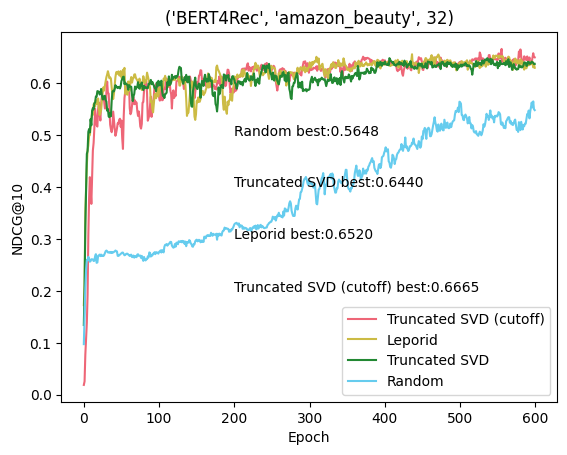

Plotting Leporid JcqMqXwFo6U5TVvG
Plotting Random 2eMGKVswzdalRX7x
Plotting Truncated SVD (cutoff) 63Mt1IzDRSFvPbiX
Plotting Truncated SVD DgWIl8n6UD52jGGj


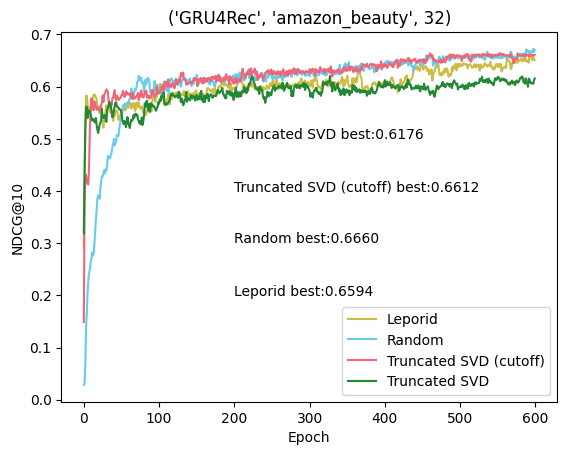

Plotting Truncated SVD s7cGAEl1sab7pLbA
Plotting Leporid LEGTSdGDWowWAPmP
Plotting Random BxJZFYDa7854ojtG


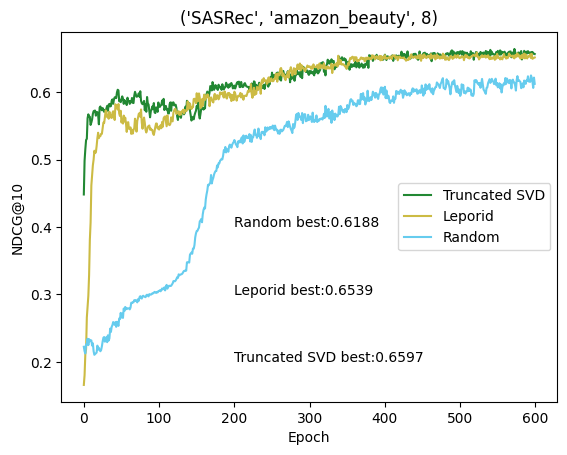

Plotting Leporid S5x23tsWF1yJUpND
Plotting Truncated SVD 0F5ZTGFKTA22erOC
Plotting Random KaByqvnrBcCRvGZM


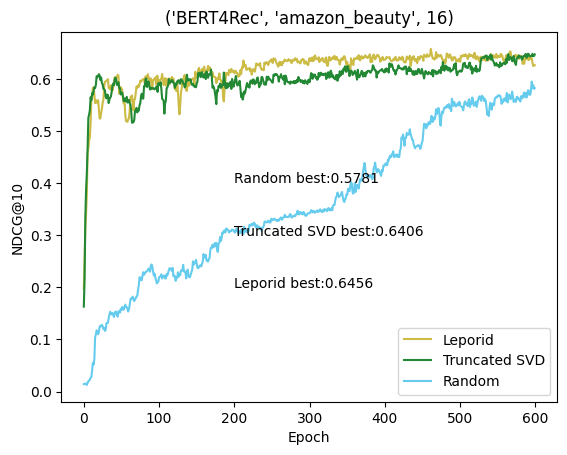

Plotting Truncated SVD LfyPrAYSF1DeROkw
Plotting Leporid 1nfA5wXYJamdTNph
Plotting Random 7NfatqV4prekAn6i


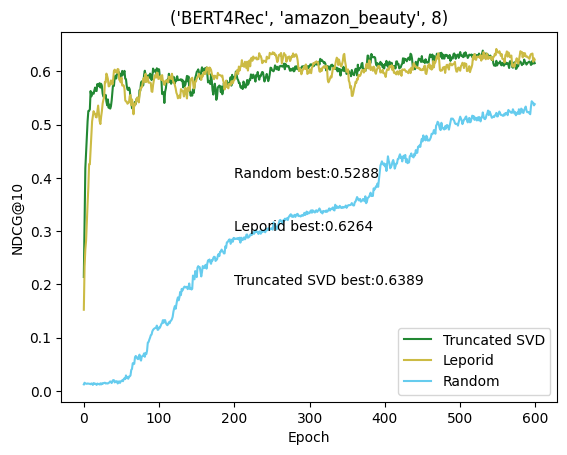

Plotting Leporid MdIFezIN7SQ7AMVi
Plotting Truncated SVD cFCQyiKrRKnT5jlZ
Plotting Random TGdE0iP3kAIjwy9l


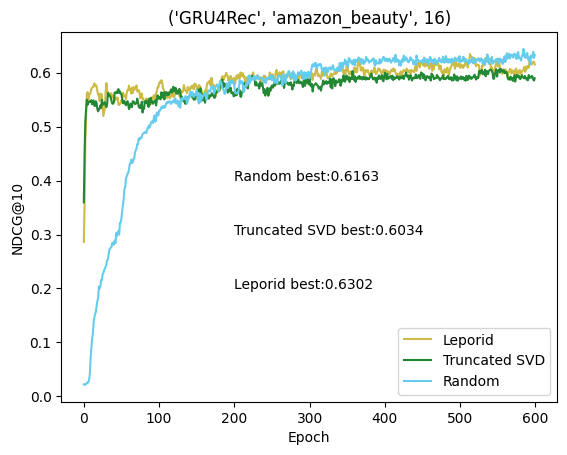

Plotting Leporid G9wqjDQ4dXJjVAyy
Plotting Truncated SVD kbn6uopfAJSoRLLA
Plotting Random aMS0FNOOTKH9zmTw


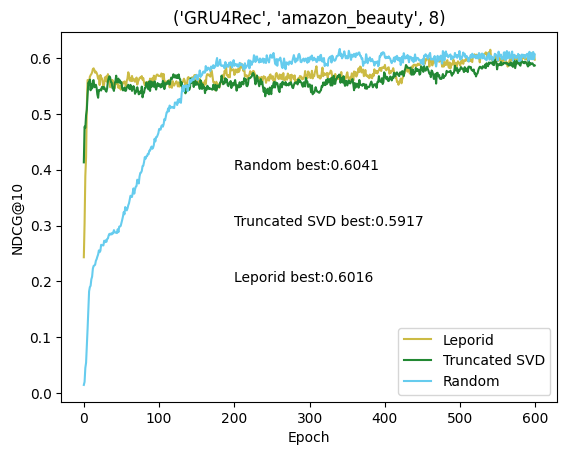

Plotting Truncated SVD (cutoff) odz0id69LvV0PULS
Plotting Random HsSLyhssbCOsHgCc
Plotting Truncated SVD gFK2IhafsEcC3KSu


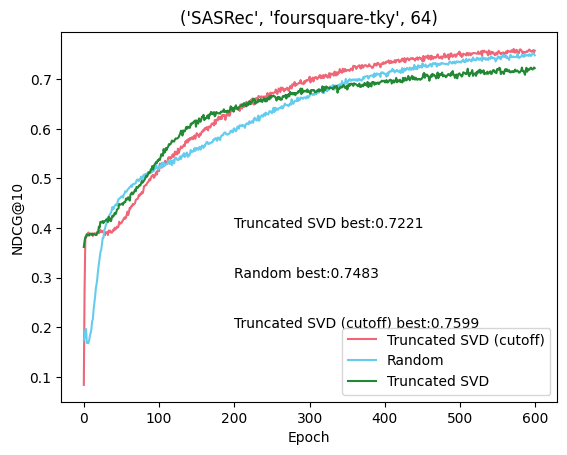

Plotting Random cRrDtWzVRXuK3aUJ
Plotting Truncated SVD UDuxB0McYQYadGty
Plotting Truncated SVD (cutoff) rreOseuPStbOGOUJ


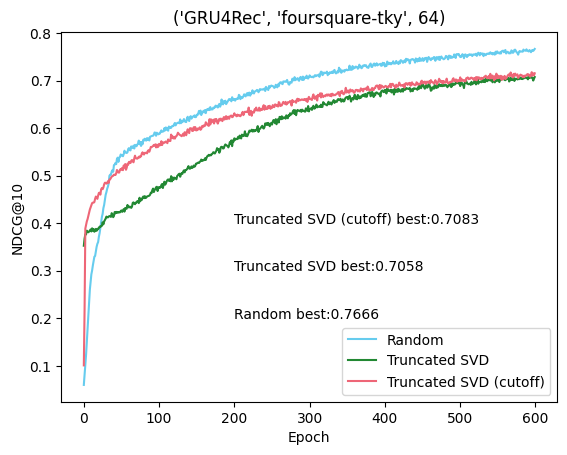

Plotting Random MIjPBTSzzJb0aBVk
Plotting Truncated SVD mJnL2pwkDBw85qIX


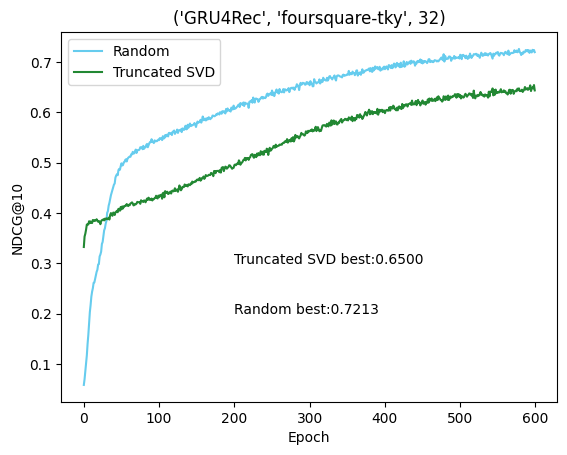

Plotting Random ApZ2h4RaCFPp4RiN
Plotting Truncated SVD oxTRLD5aeujjGzRW


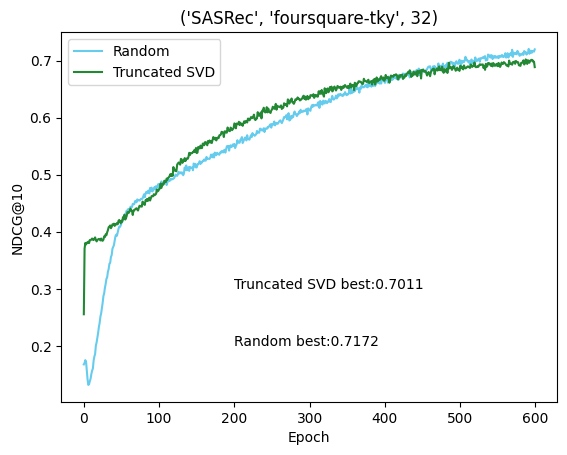

Plotting Truncated SVD (cutoff) H0oGuRsNCmXViacc
Plotting Random PPaP7EGdEbnw8lbQ
Plotting Truncated SVD BCxZu7MTgzxkLBXb


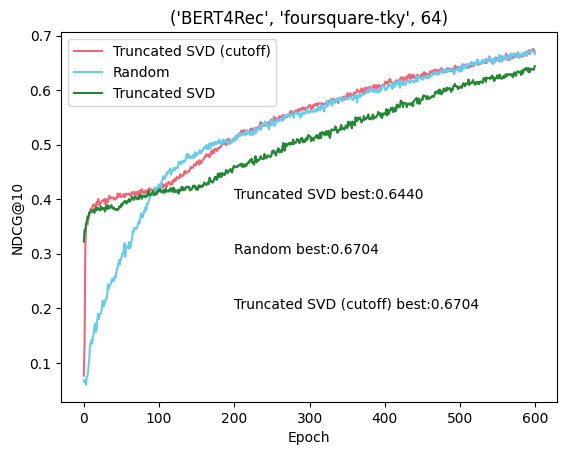

Plotting Random 8erhl9FcQN3i32Cf
Plotting Truncated SVD GTAzhb16GCeafkVG


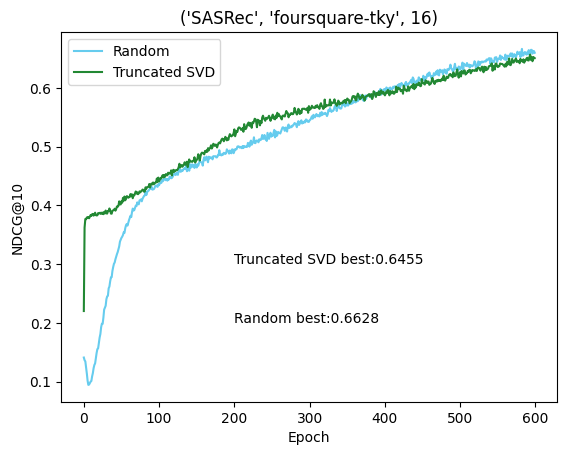

Plotting Random OmoFullNfPDr7qVO
Plotting Truncated SVD TfIAI4XgKusUQbvZ


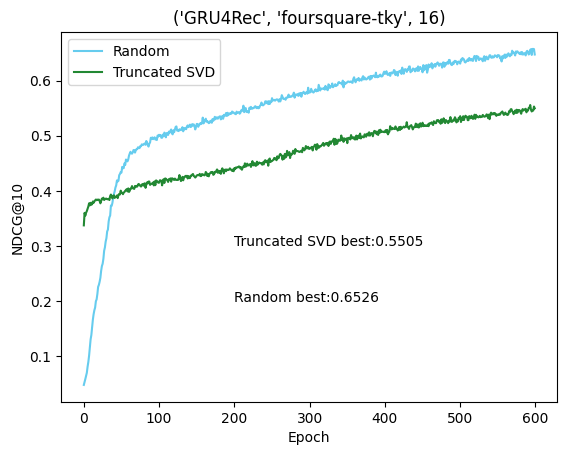

Plotting Truncated SVD JFKsbYueLvvcHnOa
Plotting Random KfjvPjvWj7cBUWwC


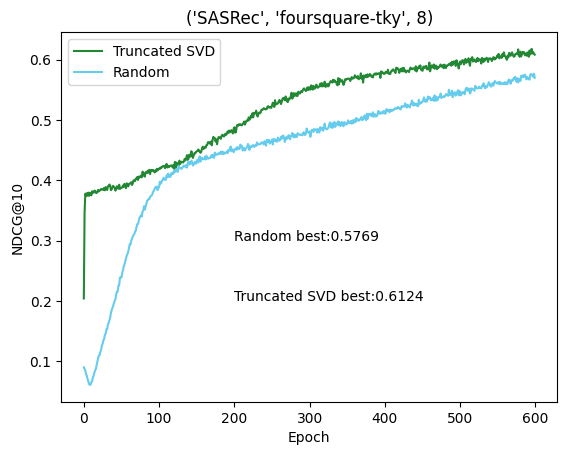

Plotting Random USv98RT7ONtWrou3
Plotting Truncated SVD BEejwsyQzUbKUUWo


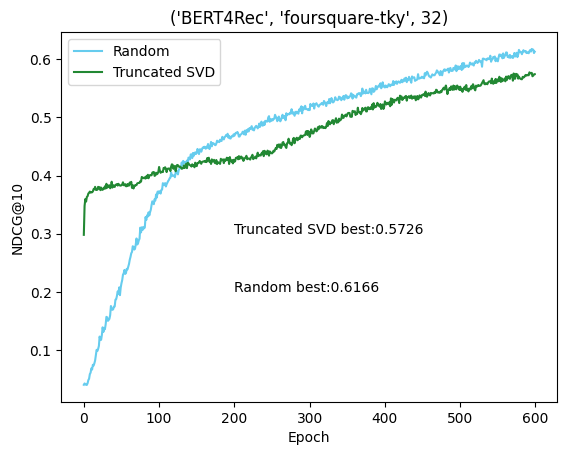

Plotting Truncated SVD 98TxCzr9jOcLFQFS
Plotting Leporid hxhy9x5qUNfNOifH
Plotting Truncated SVD (cutoff) 2277d6Fcj3Eog8jk
Plotting Random hEXQ2mr2Umjz8C2v


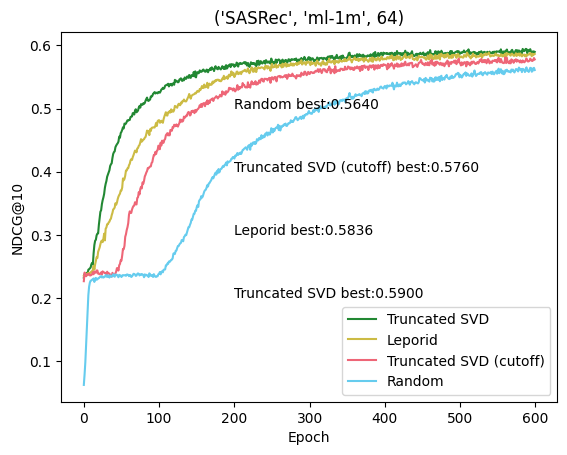

Plotting Truncated SVD (cutoff) z6g7a4x9mUX4hBKH
Plotting Leporid rxr8jxw5rHsJhmp2
Plotting Truncated SVD dJl1H30GUpAxFVuL
Plotting Random JOlRc9z22oQER1hA


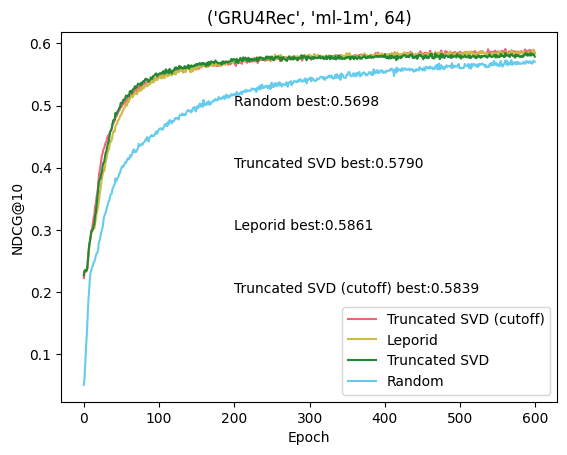

Plotting Truncated SVD CsZhSBbjbXWPzV4s
Plotting Leporid 6wvTKKaXzYUmx7UU
Plotting Random Zh6LOYajdVRzqkC8


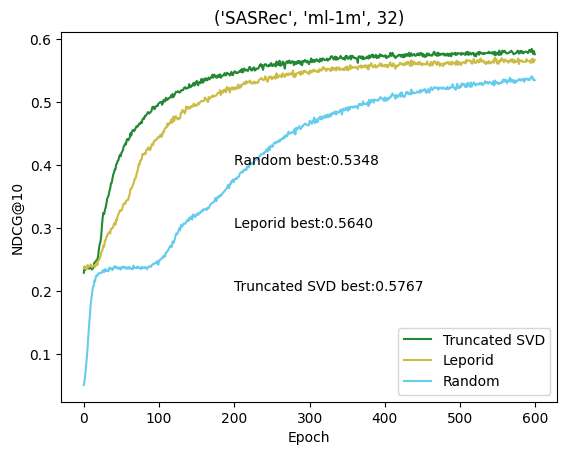

Plotting Truncated SVD 7AHCzpiSOMZVO25R
Plotting Leporid R9gYU8FwNYmFvSYK
Plotting Random v22rx89uxQGalEMZ


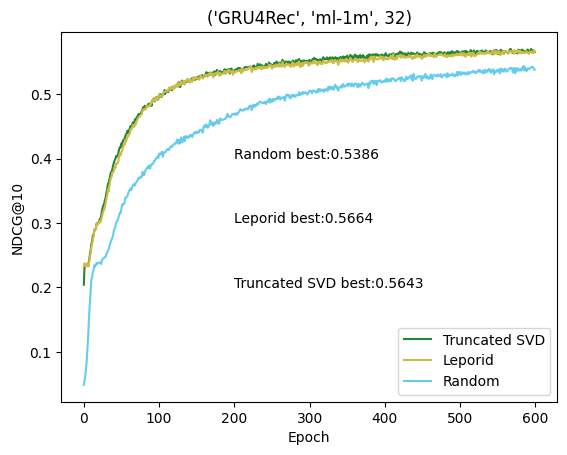

Plotting Leporid LNuQaHapc07gYd1a
Plotting Truncated SVD eYzevtFjdqfuh1Gv
Plotting Random m1n55abv5D8b8uPu


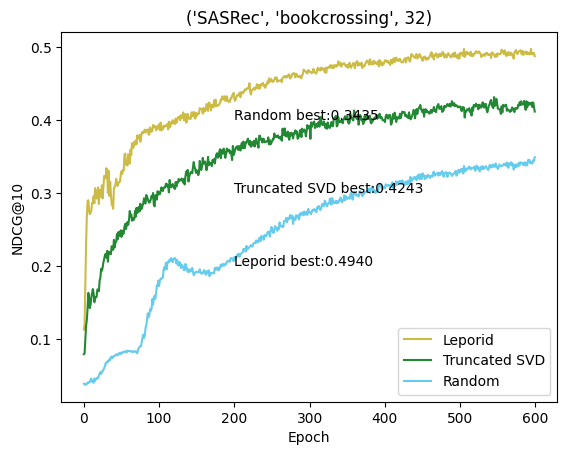

Plotting Random JnZT7FOkp4pnMD4B
Plotting Truncated SVD k72msKxVkK5hnuau


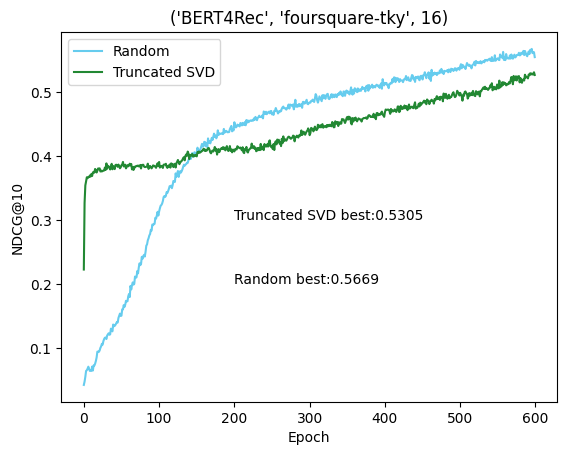

Plotting Truncated SVD (cutoff) U03faL5dkjOd32d5
Plotting Truncated SVD S2DxM9kOGSMq7Jos
Plotting Leporid wpc0dqlT1ULVf0uR
Plotting Random jZbb0o38SIpcqAty


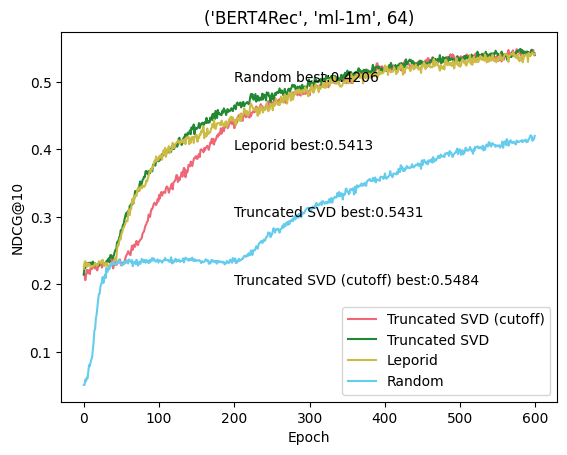

Plotting Leporid nFkEfgnAdZ406D5J
Plotting Truncated SVD (cutoff) Q7XaPisCYFGEiQwi
Plotting Truncated SVD XuDjTdVFlaKEL6oK
Plotting Random mEWsFfQB4YyxekyH


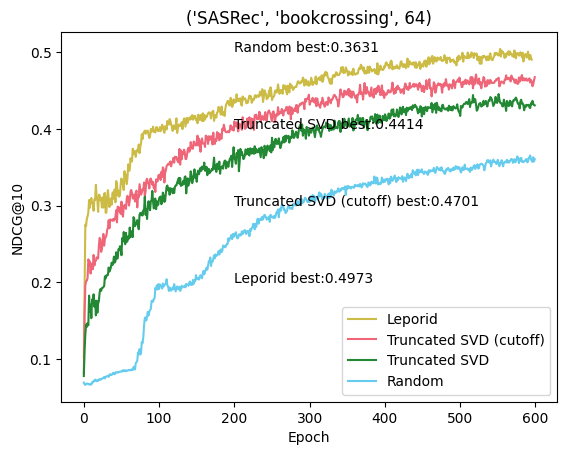

Plotting Leporid wQHBEwhDzWKTUlZa
Plotting Truncated SVD EE4o5wdHAH4UDbOb
Plotting Random JzXrweAghFFcgDVj


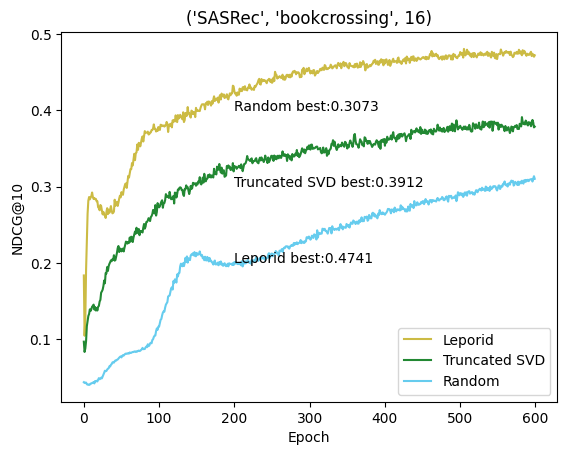

Plotting Random Hivlu9kKTqa9QBxq
Plotting Truncated SVD PMA7Ui8UTZ9SP8G6


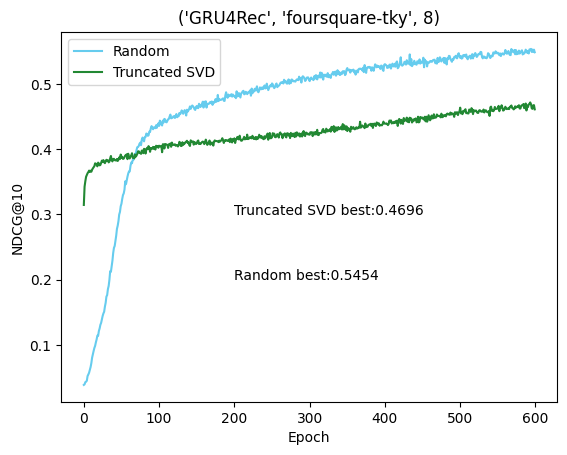

Plotting Truncated SVD Woi50mp03i9n3XYY
Plotting Leporid CeTlOEDAXmABnK3O
Plotting Random Nz91XEkWoQXcJMKJ


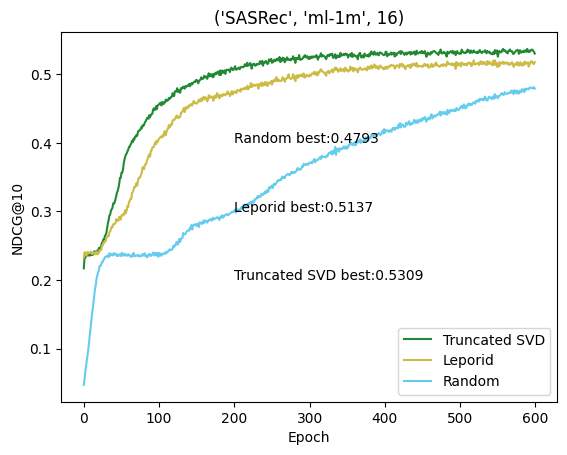

Plotting Truncated SVD y7nwjjHZTkdEa4gy
Plotting Leporid 1Wb0K6urP2pFWe8a
Plotting Random 0fw7NZEGcGg3hWnJ


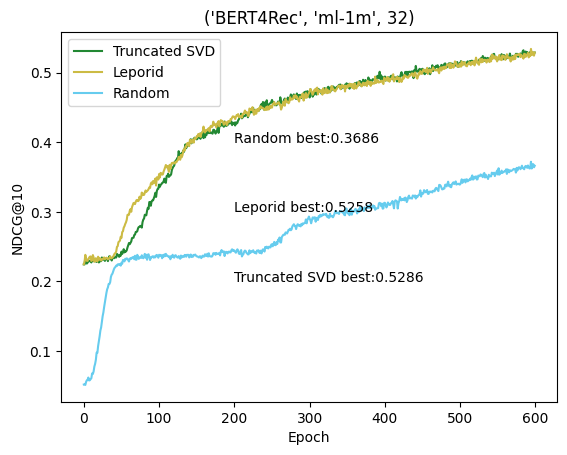

Plotting Truncated SVD G3jxrBrPIHfUBK9z
Plotting Leporid 8gXn6LYB14z1PuEb
Plotting Random 7mWPG825MfnNe85u


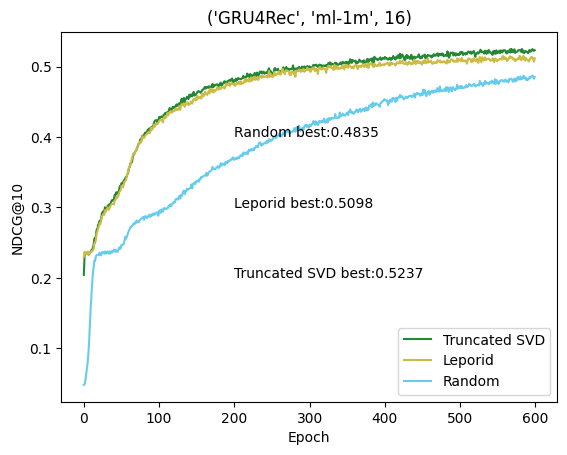

Plotting Truncated SVD ups2mmYzhfNc6aLT
Plotting Leporid SiljTlEeKnQfj6Kr
Plotting Truncated SVD (cutoff) 4goUouyl0ALdIA2S
Plotting Random fuojQS2gI1Qxq7m1


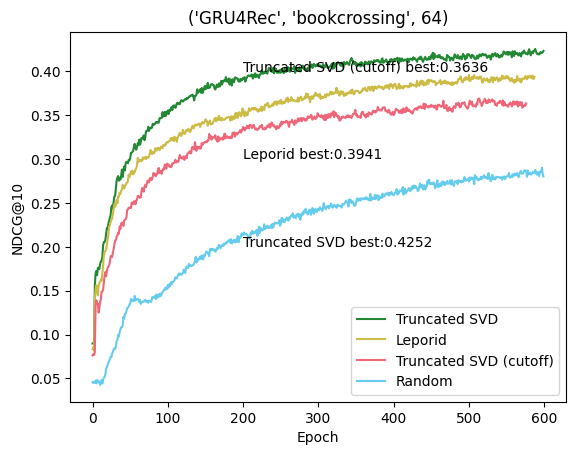

Plotting Truncated SVD (cutoff) qGxaufMQP9MrzXC4
Plotting Leporid ZnsncXOeATkQTI30
Plotting Random Mbq7Z2joNTh3XdB7
Plotting Truncated SVD xii0xpNHKXusZOI0


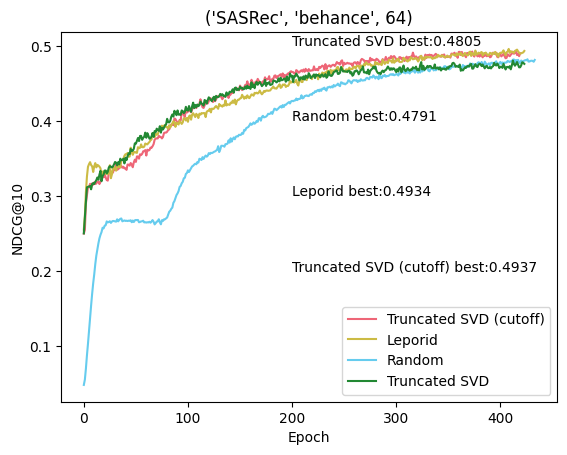

Plotting Leporid zJ7WzDW6RTS8f6ST
Plotting Random vUMGHpskWk53mhnf
Plotting Truncated SVD uYJjG1o5T21gGRn3


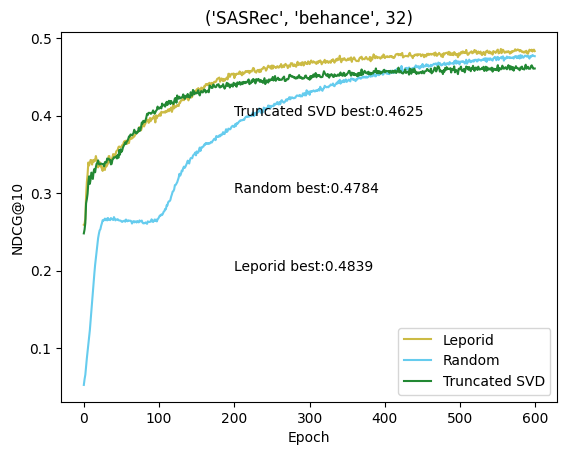

Plotting Truncated SVD 82MWkhb6WPGH79Ns
Plotting Leporid tnIQGiSHyHVAmhfv
Plotting Random M6RwAhOOr9do1nlz


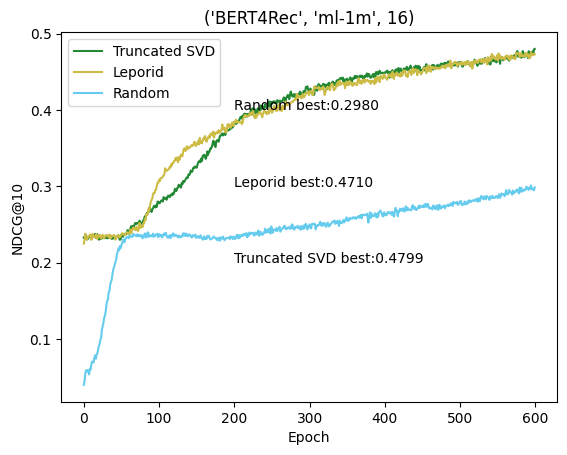

Plotting Leporid 4eQ4cWEeRXgdqa3n
Plotting Random YVYjHvlwrqaUihv5
Plotting Truncated SVD hiqlgN6w1ekzvA0d


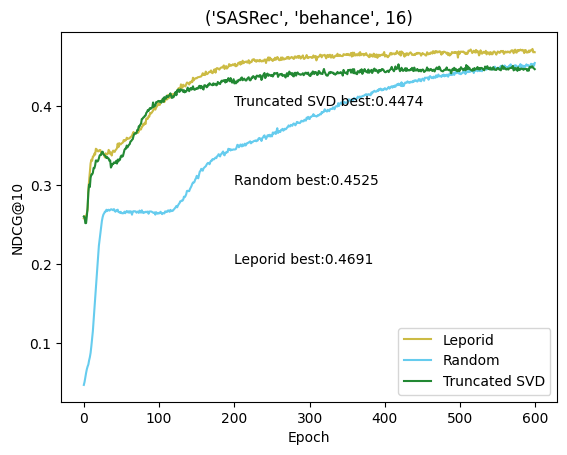

Plotting Random KGhFHPKqrDZK4ppv
Plotting Truncated SVD el0i0VUADVtBzt6D


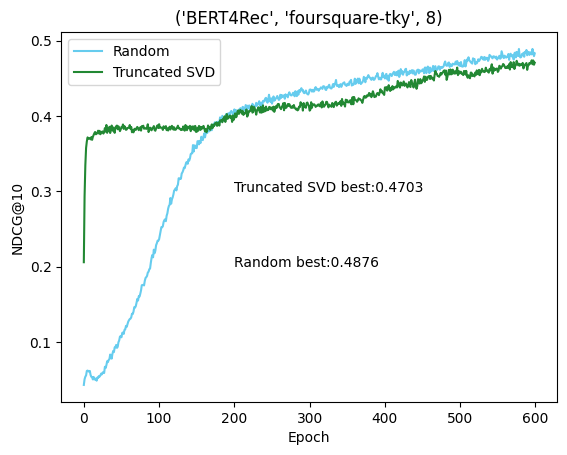

Plotting Leporid u241tFTr200MPFMF
Plotting Truncated SVD XjyedmxV4XfXhq9H
Plotting Random NaKsoGJrKj4PUqsF


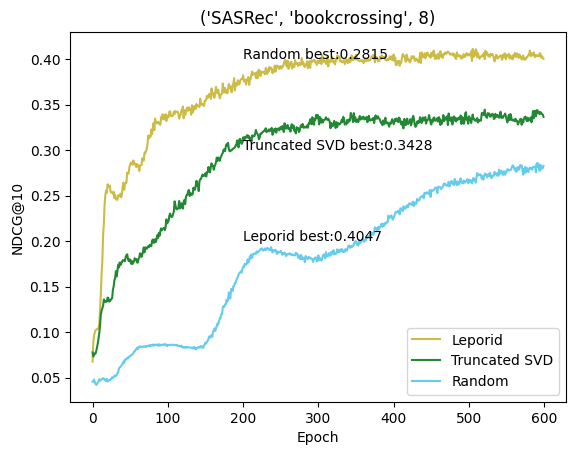

Plotting Leporid mAbaAGesaxiZvseg
Plotting Truncated SVD bcIvFebwjw2e9BIk
Plotting Random YPLlm1zIuLV6CdTo
Plotting Truncated SVD (cutoff) zncsGv17Nbw2tB1i


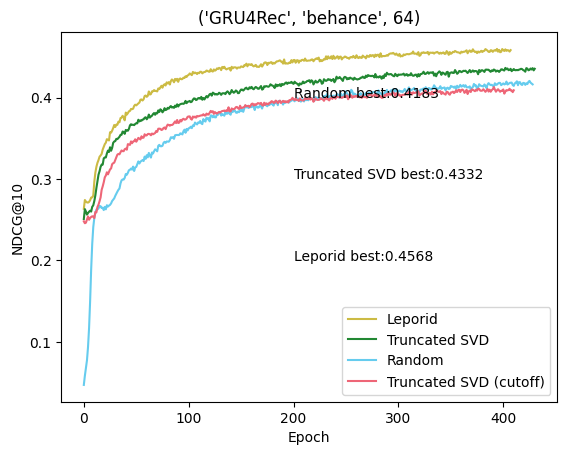

Plotting Truncated SVD wQ6tUG7PuUqVqmjy
Plotting Leporid IMfuH0E6ZccnwxIt
Plotting Random 46iJeLjsLpNKIEtr


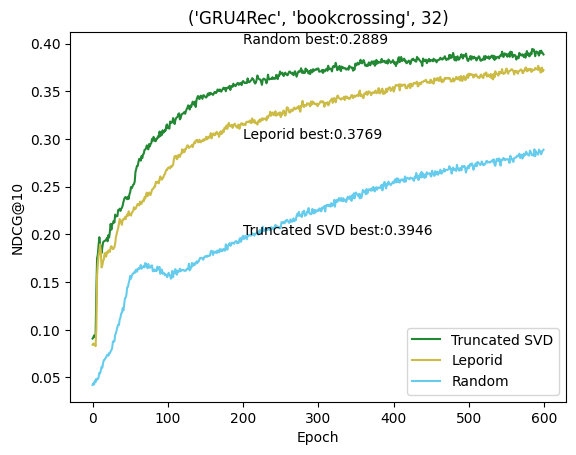

Plotting Leporid cNj3vCeDWiTDVf5h
Plotting Truncated SVD Y6hMMnkvPJQYzy57
Plotting Random ie8nuXmgFg3l5y09


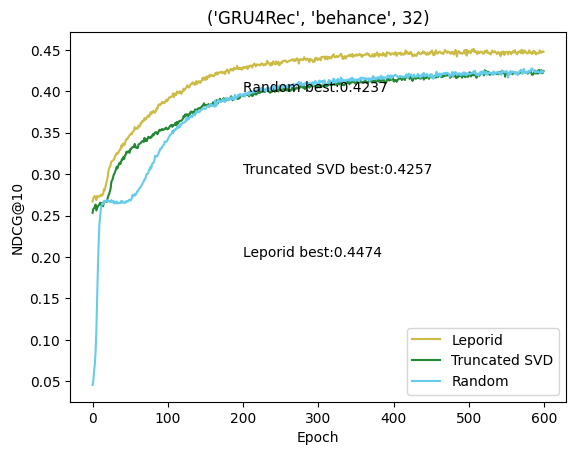

Plotting Truncated SVD PnVHMKMgPKt35L6S
Plotting Leporid t1q767VGY24D08CZ
Plotting Random O3DCmnflXAWakYq3


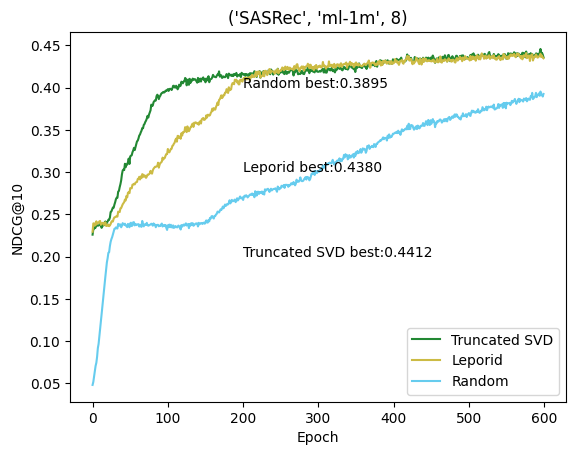

Plotting Truncated SVD m2JIfNA5osL2DHl8
Plotting Leporid yEJterKr9TiMQKLE
Plotting Random xfkclA25mTE3Glou


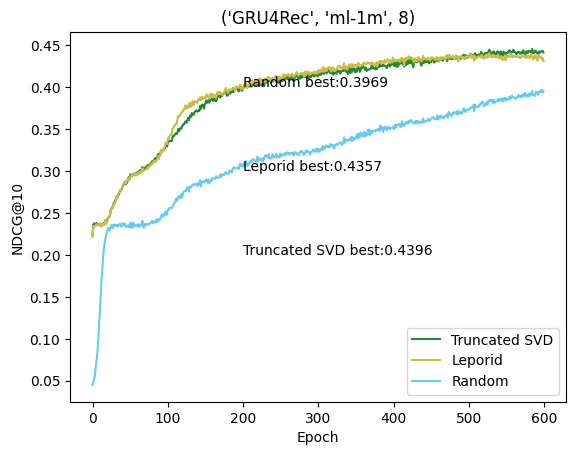

Plotting Truncated SVD (cutoff) pT9gbSyvRhbhwQNU
Plotting Leporid rkifW7Jsr0b0qpDb
Plotting Truncated SVD AfWDFCA1D0SMbJbS
Plotting Random AvKQfGB9KDr8TkOh


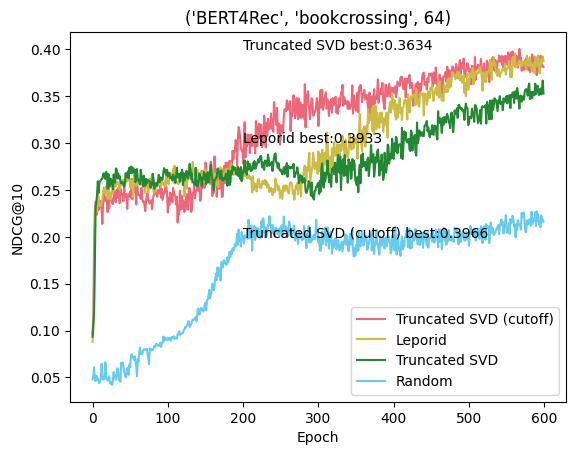

Plotting Leporid oM7zFtxtg24OcGcB
Plotting Truncated SVD im3p2yXV0niEPj3i
Plotting Random 9CQacRPKMV2IFrc4


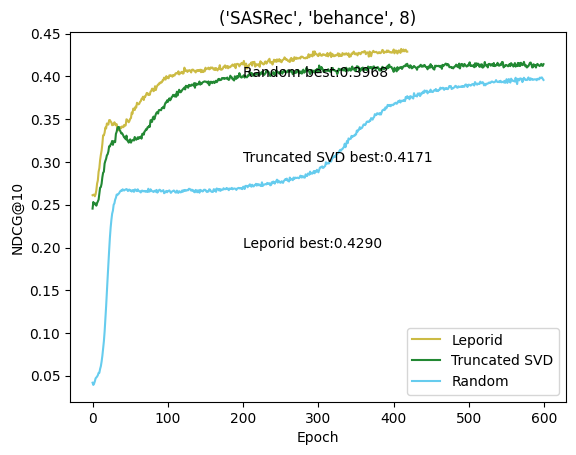

Plotting Leporid 4fOfa5TjXUWNahxQ
Plotting Random Cejr52aqrkDowdry
Plotting Truncated SVD KSHioxP6LrRbq1De


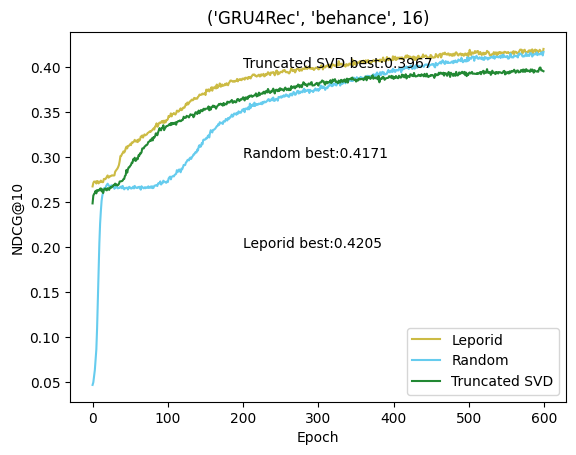

Plotting Leporid UPXyyX31R7UtuwSG
Plotting Truncated SVD Fk8zwpxNXi73u8Vi
Plotting Truncated SVD (cutoff) 2WyHKqDxPLa3qVnf
Plotting Random wEVZ1eFjIE0MU3Tw


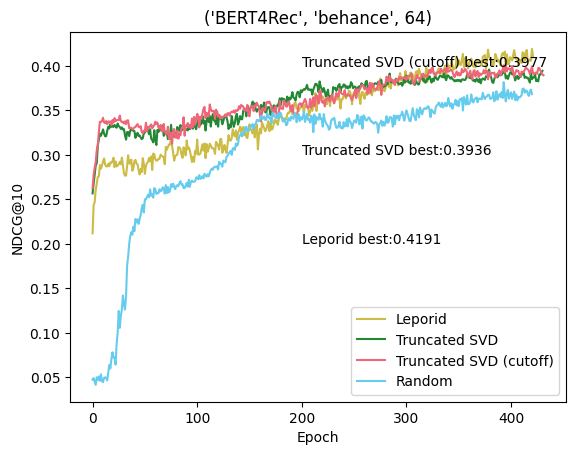

Plotting Truncated SVD JyZozjDXwUy9j9PY
Plotting Leporid l2DtVmjwsM9me1Bp
Plotting Random 0152Oxfow4fJkHeI


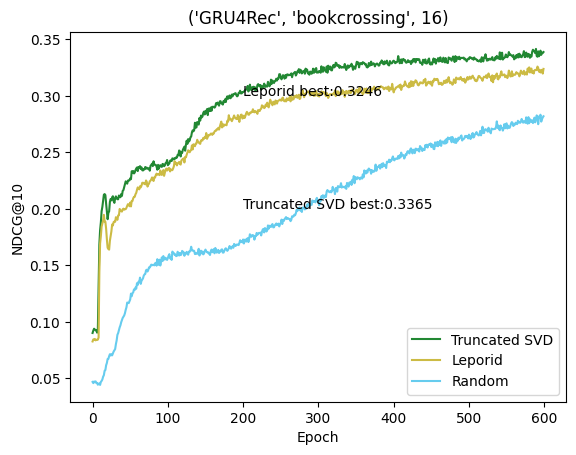

Plotting Leporid aqiXxWC4GoUGlLiS
Plotting Truncated SVD HdsL66YWk9SkjEa1
Plotting Random yoGGs3FmvQVdwqO6


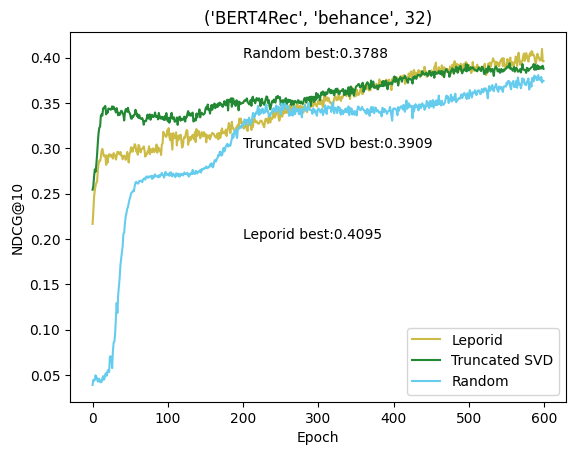

Plotting Leporid HLzhdA5NkBYgyVHi
Plotting Truncated SVD bWHXOyv4mxkjvkCy
Plotting Random Qjr14KJKcb6g6kms


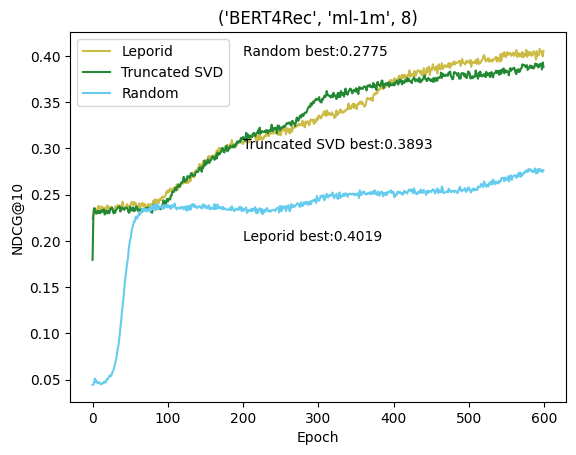

Plotting Leporid zxOlEAeF24xIHCB4
Plotting Truncated SVD LqhvNy38EnJeGgNM
Plotting Random iewe4hzBWRCobyP1


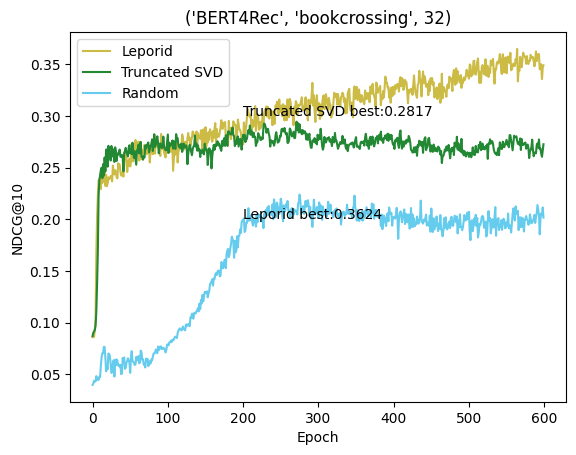

Plotting Leporid zRmph5GxFmDBPXJH
Plotting Truncated SVD ZjiPpQysvLi9k3pJ
Plotting Random TH7WxHQIYVFJSw20


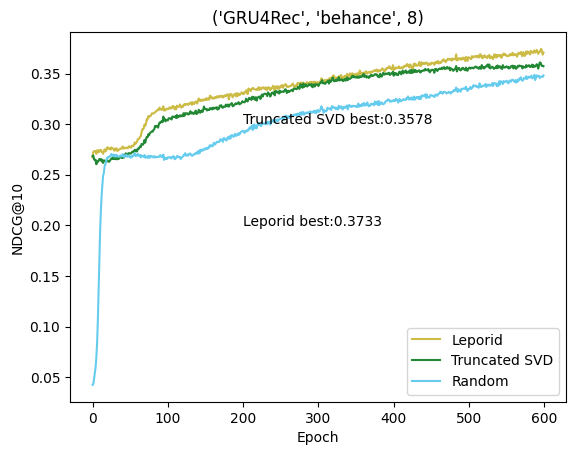

Plotting Truncated SVD XviF7yQ3c7jVmqL6
Plotting Leporid 3hyDnNUr37kgBOVn
Plotting Random Gv9HIOrhgiHMaWca


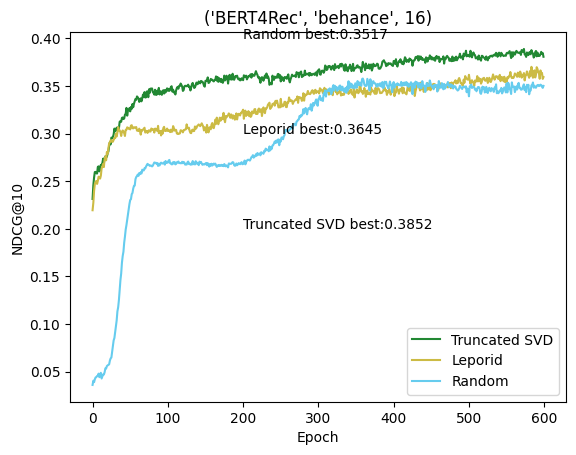

Plotting Truncated SVD cGmec5Q8ymKB9jzU
Plotting Leporid EuBeWzIa7N3MfK2A
Plotting Random P7KZfyVimF2QvjKR


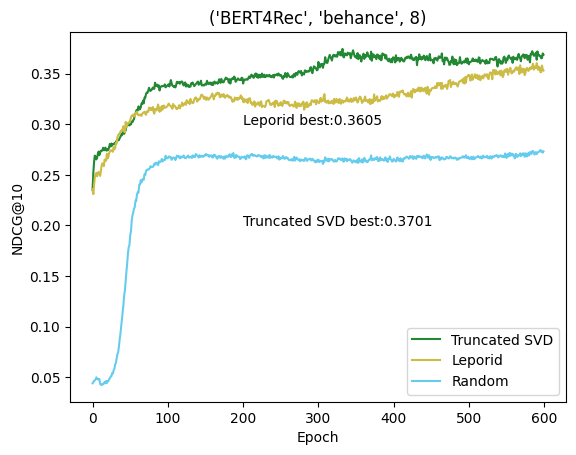

Plotting Leporid k2Z1yrtyZZAcxheg
Plotting Truncated SVD 8xNloRV2DuLzUbZq
Plotting Random 2JC7Ltr8GOnX9a1g


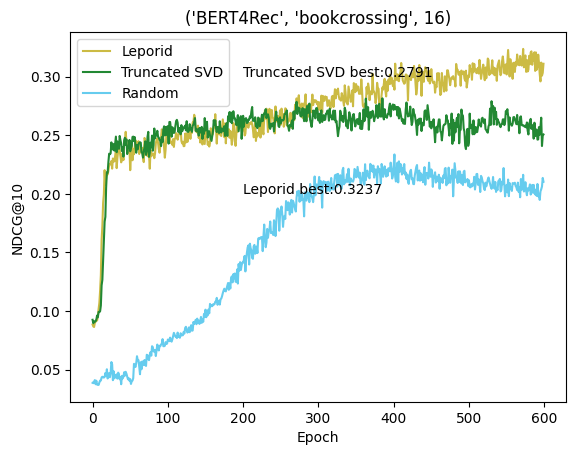

Plotting Random NKh6csTOiSxvKls4
Plotting Leporid PQ12CVAj2y4FeYGD
Plotting Truncated SVD tBjCY8AkUbe8RAD6


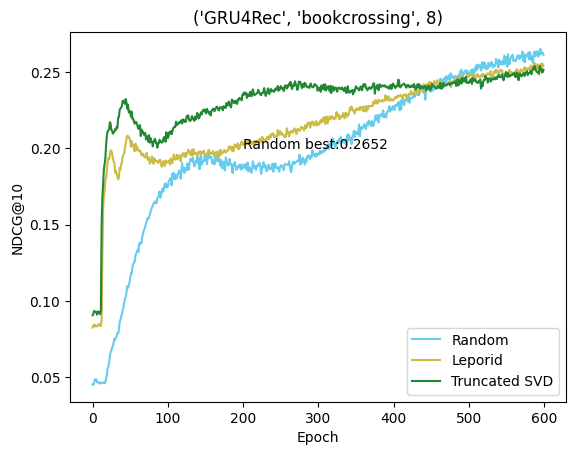

Plotting Leporid 73vXl395mF0L3SsY
Plotting Truncated SVD oevtkWQYGMJIoDDG
Plotting Random 5zb80GZniusLXGFM


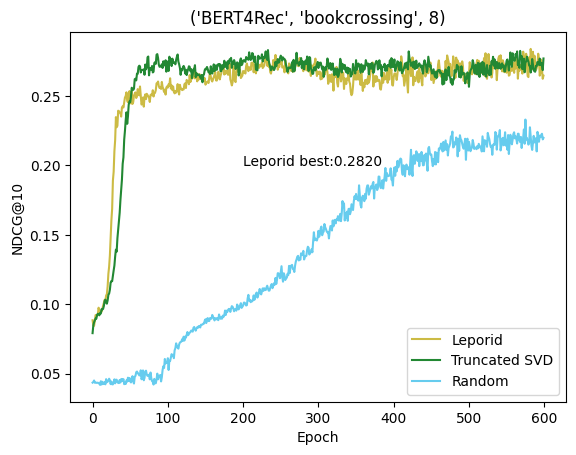

In [14]:
# Plot the metrics

for exp_subset_keys, exp_ids in separated_exps.items():
    to_remove = ["Leporid (cutoff)"]

    already_plotted = set()

    plt.figure()
    for exp_id, values in exps_metrics.items():
        if exp_id not in exp_ids:
            continue
        label = conf_name[exp_id]
        if label in to_remove or label in already_plotted:
            continue
        already_plotted.add(label)
        print(f"Plotting {label}",exp_id)
        plt.plot(values, label=label, color=color_map[label])
        # annotate the best value
        best_value = test_metrics[exp_id]
        plt.annotate(f"{label} best:{best_value:.4f}", (200,0.1+len(already_plotted)/10))
    #plt.xlim(0,500)
    #plt.xscale("log")
    plt.title(f"{exp_subset_keys}")
    plt.xlabel("Epoch")
    plt.ylabel(test_metric[3:].split("/")[0].replace("_",""))
    plt.legend()
    plt.show()

## VARYING EMBEDDING SIZE

In [15]:
results = {}

for exp_subset_keys, exp_ids in separated_exps.items():
    to_remove = ["Leporid (cutoff)","Truncated SVD (cutoff)"]
    already_plotted = set()
    for exp_id, values in exps_metrics.items():
        if exp_id not in exp_ids:
            continue
        label = conf_name[exp_id]
        if label in to_remove or label in already_plotted:
            continue
        already_plotted.add(label)
        
        best_value = test_metrics[exp_id]
        
        if f"{exp_subset_keys}" not in results.keys():
            results[f"{exp_subset_keys}"] = []
        if f"{label}" not in results[f"{exp_subset_keys}"]:
            results[f"{exp_subset_keys}"].append({f"{label}":f"{best_value:.4f}"})

#for key in results.keys():
   #print(key)



In [16]:
results

{"('SASRec', 'amazon_beauty', 64)": [{'Truncated SVD': '0.6822'},
  {'Random': '0.6925'},
  {'Leporid': '0.6863'}],
 "('GRU4Rec', 'amazon_beauty', 64)": [{'Random': '0.6842'},
  {'Leporid': '0.6693'},
  {'Truncated SVD': '0.6722'}],
 "('SASRec', 'amazon_beauty', 32)": [{'Leporid': '0.6712'},
  {'Truncated SVD': '0.6810'},
  {'Random': '0.6588'}],
 "('SASRec', 'amazon_beauty', 16)": [{'Leporid': '0.6694'},
  {'Truncated SVD': '0.6721'},
  {'Random': '0.5901'}],
 "('BERT4Rec', 'amazon_beauty', 64)": [{'Truncated SVD': '0.6628'},
  {'Leporid': '0.6605'},
  {'Random': '0.6279'}],
 "('BERT4Rec', 'amazon_beauty', 32)": [{'Leporid': '0.6520'},
  {'Truncated SVD': '0.6440'},
  {'Random': '0.5648'}],
 "('GRU4Rec', 'amazon_beauty', 32)": [{'Leporid': '0.6594'},
  {'Random': '0.6660'},
  {'Truncated SVD': '0.6176'}],
 "('SASRec', 'amazon_beauty', 8)": [{'Truncated SVD': '0.6597'},
  {'Leporid': '0.6539'},
  {'Random': '0.6188'}],
 "('BERT4Rec', 'amazon_beauty', 16)": [{'Leporid': '0.6456'},
  {'T

 SASRec - amazon_beauty


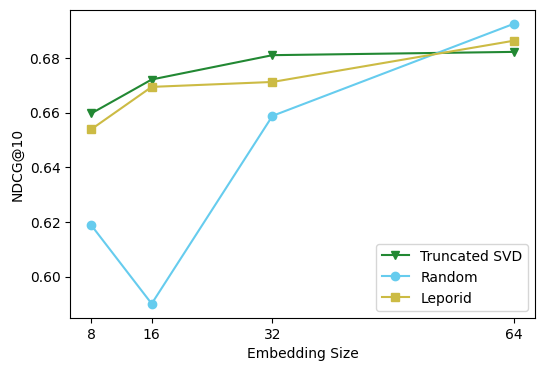

 GRU4Rec - amazon_beauty


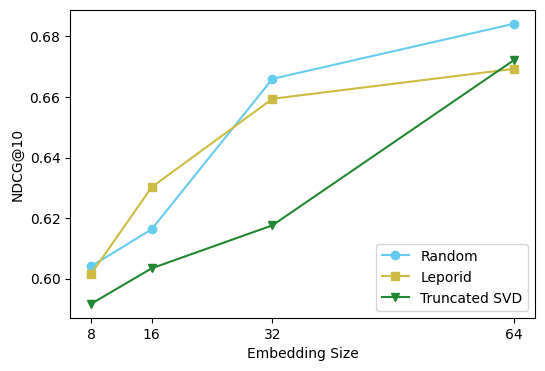

 BERT4Rec - amazon_beauty


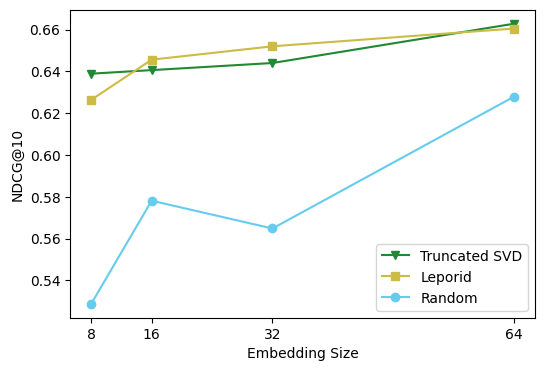

 SASRec - foursquare-tky


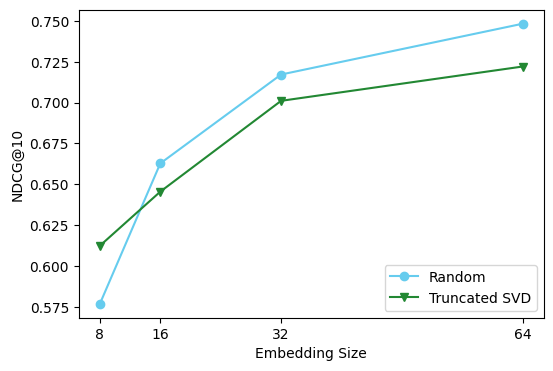

 GRU4Rec - foursquare-tky


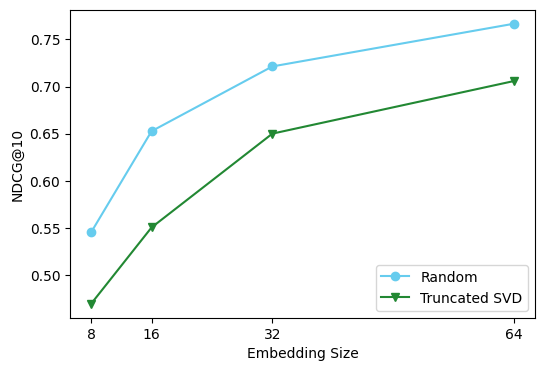

 BERT4Rec - foursquare-tky


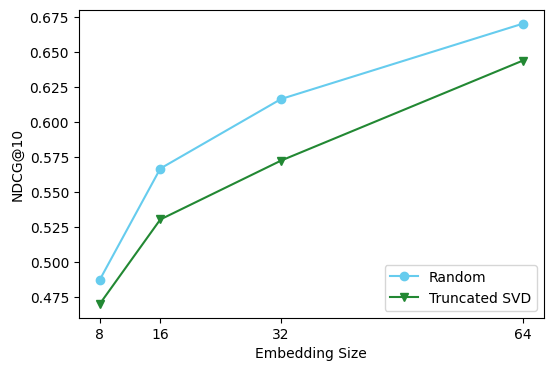

 SASRec - MovieLens 1M


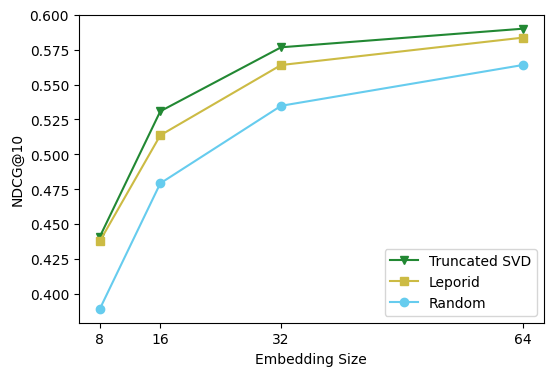

 GRU4Rec - MovieLens 1M


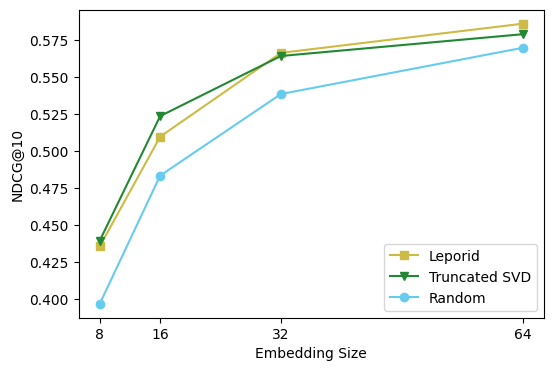

 SASRec - Bookcrossing


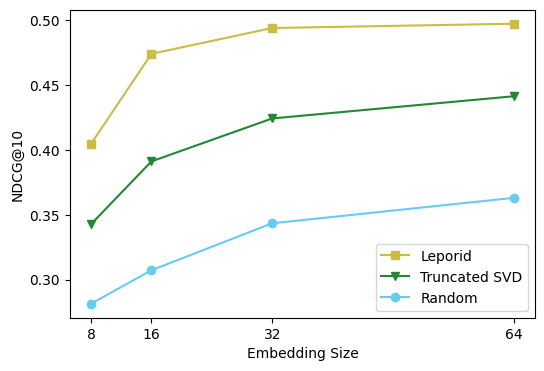

 BERT4Rec - MovieLens 1M


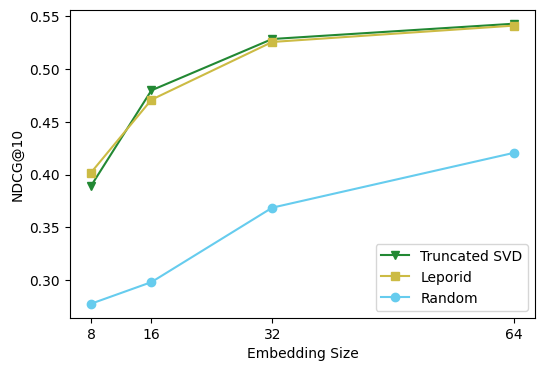

 GRU4Rec - Bookcrossing


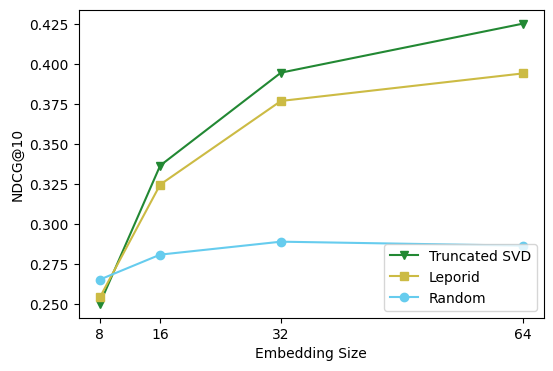

 SASRec - Behance


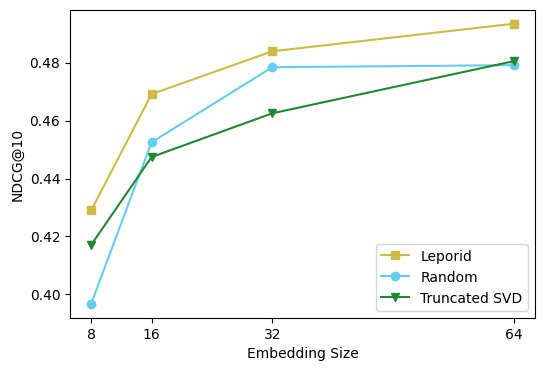

 GRU4Rec - Behance


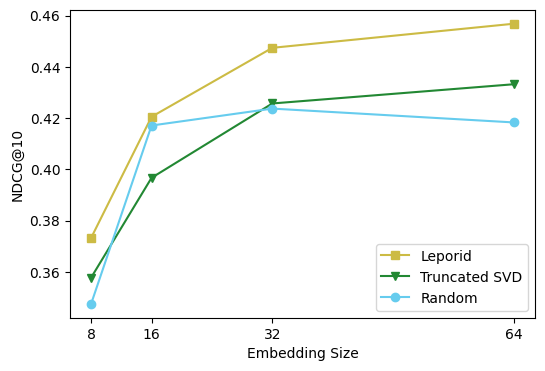

 BERT4Rec - Bookcrossing


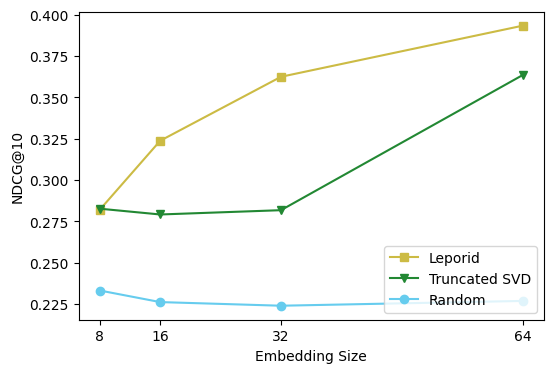

 BERT4Rec - Behance


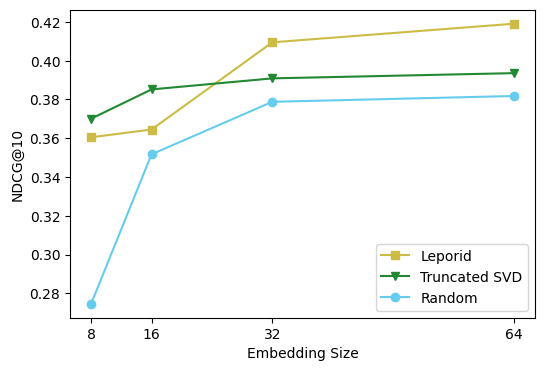

In [19]:
def plot_initializations(data):
    organized_data = {}
    for key, metrics in data.items():
        model, dataset, embedding_size = eval(key)
        embedding_size = int(embedding_size)
        if (model, dataset) not in organized_data:
            organized_data[(model, dataset)] = {}
        for metric in metrics:
            for init, value in metric.items():
                if init not in organized_data[(model, dataset)]:
                    organized_data[(model, dataset)][init] = []
                organized_data[(model, dataset)][init].append((embedding_size, float(value)))

    for (model, dataset), metrics in organized_data.items():
        plt.figure(figsize=(6, 4))
        for init, values in metrics.items():
            # order the values by embedding size
            values.sort(key=lambda x: x[0])
            embedding_sizes, scores = zip(*values)
            plt.plot(embedding_sizes, scores, label=init, color=color_map[init], marker=marker_map[init])
        
        dataset_label = dataset
        if dataset == 'ml-1m':
            dataset_label = 'MovieLens 1M'
        elif dataset == 'bookcrossing':
            dataset_label = 'Bookcrossing'
        elif dataset == 'behance':
            dataset_label = 'Behance'
        #plt.title(f" {model} - {dataset_label}")
        print(f" {model} - {dataset_label}")
        plt.xlabel("Embedding Size")
        plt.ylabel(test_metric[3:].split("/")[0].replace("_",""))
        plt.xticks([8, 16, 32, 64])
        plt.legend(loc="lower right")
      
        plt.show()

# Eseguire la funzione
plot_initializations(results)